# Marketing Customer Value Analysis

###### Understand customer demographics and buying behavior. Use predictive analytics to analyze the most profitable customers and how they interact. Take targeted actions to increase profitable customer response, retention and growth

In [25]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# 1 Get the Data

In [26]:
df = pd.read_csv('05 WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [27]:
def fun_EmploymentStatus (x):
    if x=='Retired': return 'a. Retired'
    elif x=='Unemployed': return 'c. Unemployed'
    else: return 'b. Others'
df['EmploymentStatus_bin'] = df['EmploymentStatus'].apply(fun_EmploymentStatus)

In [28]:
def fun_Location (x):
    if x=='Suburban': return 'a. Suburban'
    else: return 'b. Others'
df['LocationCode_bin'] = df['Location Code'].apply(fun_Location)

In [29]:
def fun_Renew (x):
    if x=='Offer2': return 'a. Offer2'
    elif x=='Offer1': return 'b. Offer1'
    else: return 'c. Others'
df['RenewOfferType_bin'] = df['Renew Offer Type'].apply(fun_Renew)

In [30]:
def fun_Sales (x):
    if x=='Agent': return 'a. Agent'
    else: return 'b. Others'
df['SalesChannel_bin'] = df['Sales Channel'].apply(fun_Sales)

In [31]:
df = df[['Customer','Response','EmploymentStatus_bin','LocationCode_bin','RenewOfferType_bin',
         'SalesChannel_bin','Vehicle Size']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 7 columns):
Customer                9134 non-null object
Response                9134 non-null object
EmploymentStatus_bin    9134 non-null object
LocationCode_bin        9134 non-null object
RenewOfferType_bin      9134 non-null object
SalesChannel_bin        9134 non-null object
Vehicle Size            9134 non-null object
dtypes: object(7)
memory usage: 570.9+ KB


# 2.1 EmploymentStatus_bin

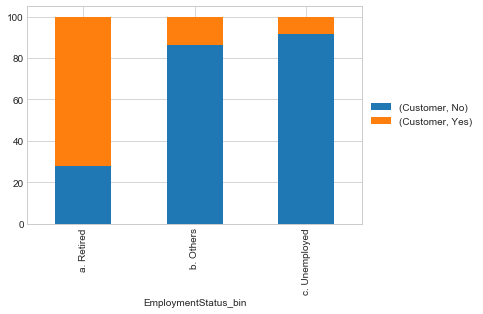

In [32]:
temp = df.pivot_table(values=['Customer'], index=['EmploymentStatus_bin'], columns=['Response'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.2 LocationCode_bin

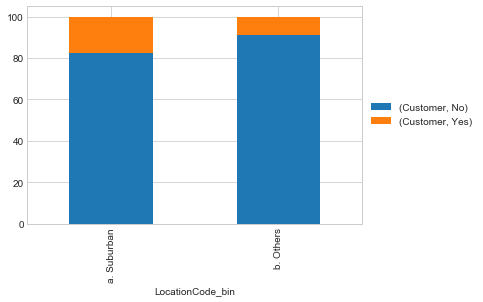

In [33]:
temp = df.pivot_table(values=['Customer'], index=['LocationCode_bin'], columns=['Response'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.3 RenewOfferType_bin

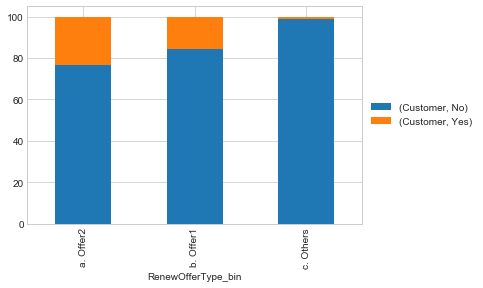

In [34]:
temp = df.pivot_table(values=['Customer'], index=['RenewOfferType_bin'], columns=['Response'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.4 SalesChannel_bin

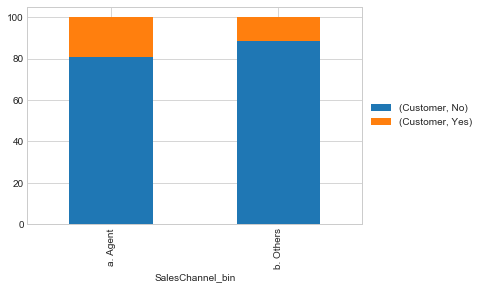

In [35]:
temp = df.pivot_table(values=['Customer'], index=['SalesChannel_bin'], columns=['Response'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2.5 Vehicle Size

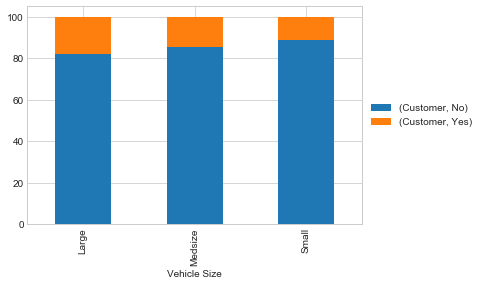

In [36]:
temp = df.pivot_table(values=['Customer'], index=['Vehicle Size'], columns=['Response'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 3 Train Test Split

In [37]:
df['actual'] = df['Response'].apply(lambda x: 0 if x == "No" else 1)
df.drop(['Customer','Response'],axis=1,inplace=True)

In [38]:
cat_feats = ['EmploymentStatus_bin','LocationCode_bin','RenewOfferType_bin','SalesChannel_bin','Vehicle Size']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [39]:
x = final_data.drop(['actual'],axis=1)
y = final_data['actual']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# 4 Building the Model

In [40]:
x_train = sm.add_constant(x_train).copy()
logit = sm.Logit(y_train, x_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.326736
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 actual   No. Observations:                 6393
Model:                          Logit   Df Residuals:                     6384
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Nov 2017   Pseudo R-squ.:                  0.2015
Time:                        22:43:52   Log-Likelihood:                -2088.8
converged:                       True   LL-Null:                       -2616.0
                                        LLR p-value:                2.807e-222
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.3599      0.226     10.435      0.000       1.917       2.803
EmploymentStatus_bin_b. Others        -2.5570      0.191    -13.356      0.000      -2.932      -2.182
EmploymentStatus_bin_c. Unemployed    -3.4622      0.205    -16.902      0.000      -3.864      -3.061
LocationCode_bin_b. Others            -0.8799      0.094     -9.374      0.000      -1.064      -0.696
RenewOfferType_bin_b. Offer1          -0.6142      0.083     -7.437      0.000      -0.776      -0.452
RenewOfferType_bin_c. Others          -3.3205      0.236    -14.054      0.000      -3.784      -2.857
SalesChannel_bin_b. Others            -0.6434      0.080     -7.998      0.000      -0.801      -0.486
Vehicle Size_Medsize                  -0.1890      0.124     -1.520      0.129      -0.433       0.055
Vehicle Size_Small                    -0.5529      0.150     -3.687      0.000      -0.847      -0.259
======================================================================================================
"""

In [41]:
x_test = sm.add_constant(x_test).copy()
y_pred = result.predict(x_test)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

max c:  0.15
max a:  0.65


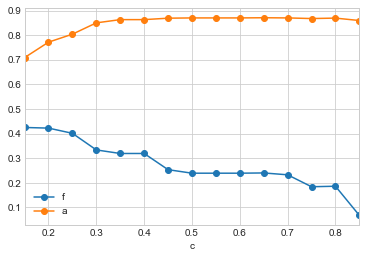

In [42]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['actual'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_c = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max c: ",max_c)
print ("max a: ",max_a)

# 5 Predictions and Evaluation

In [43]:
#using 0.25 since f does not deteriorate much and accuracy improves

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.25 else 0)
df_table = confusion_matrix(test_calc['actual'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[2024  319]
 [ 218  180]]
accuracy: 0.804086099964
precision: 0.360721442886
recall: 0.452261306533
f1 score:  0.401337792642
